# Importing Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Step 1: Importing Data Set

In [4]:
# Import ords_prods_merge dataframe
# Create a string of the path
# Define the path variable
path=r'/Users/douniaelyoussoufi/Achievement 4 '
# Load the ords_prods_merge.pkl file directly using os.path.join
merged_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_part1.pkl'))

# Step 2: Personally Identifiable Information (PII)

In [ ]:
# Display the columns of the dataset to identify any PII
merged_data.columns

In [6]:
# Drop PII columns
pii_columns = ['first_name', 'surname', 'date_joined', 'fam_status', 'gender']
merged_data.drop(columns=pii_columns, inplace=True, errors='ignore')

In [8]:
# Drop unnecessary columns for the current analysis
un_columns = ['add_to_cart_order', 'reordered', 'eval_set', 'days_since_prior_order', '_merge', 'Unnamed: 0', 'product_name', 'aisle_id', 'busiest day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'order_frequency_flag']
merged_data.drop(columns=un_columns, inplace=True, errors='ignore')

# Step 3: Regional Spending Behavior Comparison

In [10]:
# Create a "Region" column based on the "State" column
# Mapping of states to U.S. Census Bureau regions
state_to_region = {
    # Region 1: Northeast
    'maine': 'northeast', 'new hampshire': 'northeast', 'vermont': 'northeast', 'massachusetts': 'northeast', 
    'rhode island': 'northeast', 'connecticut': 'northeast', 'new york': 'northeast', 'pennsylvania': 'northeast', 
    'new jersey': 'northeast',
    
    # Region 2: Midwest
    'wisconsin': 'midwest', 'michigan': 'midwest', 'illinois': 'midwest', 'indiana': 'midwest', 'ohio': 'midwest',
    'north dakota': 'midwest', 'south dakota': 'midwest', 'nebraska': 'midwest', 'kansas': 'midwest', 'minnesota': 'midwest', 
    'iowa': 'midwest', 'missouri': 'midwest',
    
    # Region 3: South
    'delaware': 'south', 'maryland': 'south', 'district of columbia': 'south', 'virginia': 'south', 'west virginia': 'south', 
    'north carolina': 'south', 'south carolina': 'south', 'georgia': 'south', 'florida': 'south', 'kentucky': 'south', 
    'tennessee': 'south', 'mississippi': 'south', 'alabama': 'south', 'oklahoma': 'south', 'texas': 'south', 'arkansas': 'south', 
    'louisiana': 'south',
    
    # Region 4: West
    'montana': 'west', 'wyoming': 'west', 'idaho': 'west', 'nevada': 'west', 'utah': 'west', 'colorado': 'west', 
    'arizona': 'west', 'new mexico': 'west', 'alaska': 'west', 'washington': 'west', 'oregon': 'west', 'california': 'west', 'hawaii': 'west'
}

In [12]:
# Add the "Region" column by mapping the "State" column to regions
merged_data['Region'] = merged_data['state'].map(state_to_region)

In [17]:
# Compare Spending Habits by Region
# Cross the "Region" column with the "spending_flag" to analyze spending behavior
region_spending_comparison = merged_data.groupby('Region')['spending_flag'].value_counts(normalize=True).unstack()

In [37]:
# Display the comparison table
region_spending_comparison

spending_flag,High spender,Low spender
Region,,
midwest,0.020471,0.979529
northeast,0.018859,0.981141
south,0.019331,0.980669
west,0.019203,0.980797


<Figure size 1200x600 with 0 Axes>

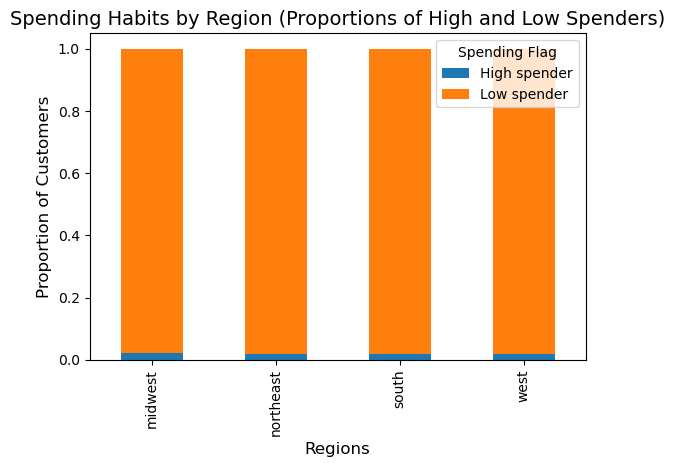

In [21]:
# Set figure size for better visibility
plt.figure(figsize=(12, 6))
# Plot the comparison of spending habits by region using counts
region_spending_comparison.plot(kind='bar', stacked=True)
# Adding titles and labels
plt.title('Spending Habits by Region (Proportions of High and Low Spenders)', fontsize=14)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Proportion of Customers', fontsize=12)
plt.legend(title='Spending Flag')
# Adjust layout to prevent cutoff
plt.subplots_adjust(bottom=0.2) 
# Save the bar chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_habits_region.png'))
# Show the plot
plt.show()

### Orders by Region Across Hours of the Day

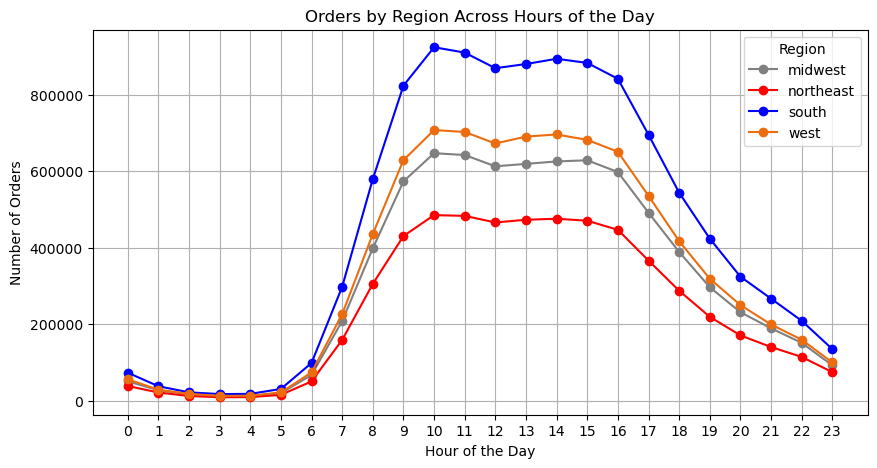

In [25]:
# Define custom colors for regions
region_colors = {'northeast': 'red', 'south': 'blue', 'midwest': 'gray', 'west': '#EC6D10'}

# Orders by Region Across Hours of the Day
region_orders_by_hour = merged_data.groupby(['order_hour_of_day', 'Region'])['order_id'].count().unstack()

plt.figure(figsize=(10, 5))
for region in region_orders_by_hour.columns:
    plt.plot(region_orders_by_hour.index, region_orders_by_hour[region], 
             marker='o', linestyle='-', label=region, color=region_colors.get(region, 'black'))

plt.title('Orders by Region Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.legend(title='Region')
plt.grid(True)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_region_day.png'))
plt.show()

### Orders by Region Across Days of the Week

<Figure size 1000x500 with 0 Axes>

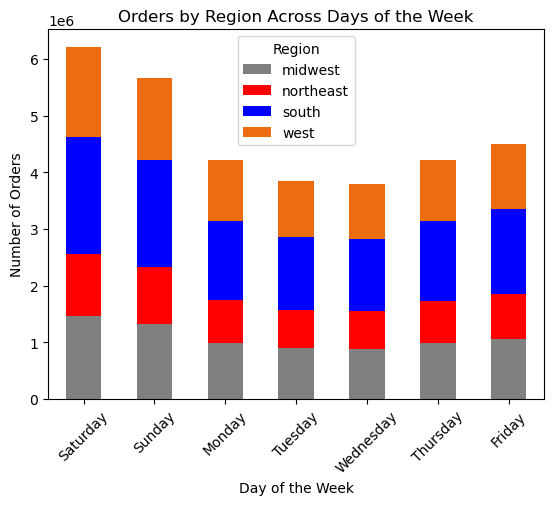

In [32]:
# Define mapping for day of the week (0 = Saturday, 1 = Sunday, ..., 6 = Friday)
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 
               4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
# Define custom colors for regions
region_colors = {'northeast': 'red', 'south': 'blue', 'midwest': 'gray', 'west': '#EC6D10'}

# Orders by Region Across Days of the Week
region_orders_by_day = merged_data.groupby(['order_dow', 'Region'])['order_id'].count().unstack()

# Rename index (day numbers → day names)
region_orders_by_day.index = region_orders_by_day.index.map(day_mapping)

plt.figure(figsize=(10, 5))
region_orders_by_day.plot(kind='bar', stacked=True, 
                          color=[region_colors[col] for col in region_orders_by_day.columns])

plt.title('Orders by Region Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_region_week.png'))
plt.show()

# Step 4: Excluding Low-Activity Customers (Less Than 5 Orders)

In [23]:
# Count the number of orders per user_id
user_order_counts = merged_data.groupby('user_id')['order_id'].nunique()

In [25]:
# Create an exclusion flag for low-activity customers (less than 5 orders)
merged_data['low_activity_flag'] = merged_data['user_id'].apply(lambda x: 1 if user_order_counts[x] < 5 else 0)

In [27]:
merged_data['low_activity_flag'].value_counts()

low_activity_flag
0    30993489
1     1441570
Name: count, dtype: int64

In [15]:
# Exclude low-activity customers (low_activity_flag == 1)
filtered_data = merged_data[merged_data['low_activity_flag'] == 0]
merged_data = filtered_data

In [ ]:
# Export the filtered data
filtered_data.to_csv(os.path.join(path, '02 Data','Prepared Data', 'filtered_merged_data.csv'))

# Step 5: Customer Profiling for Targeted Marketing Strategies

In [29]:
def create_customer_profile(row):
    profile = None

    # Priority: Affluent -> Young Professional -> Senior -> Middle-Aged Couple -> Young Parent -> Single Adult -> Budget-Conscious Shopper
    
    if row['income'] >= 90000:
        profile = 'Affluent Shopper'
    elif 25 <= row['age'] < 35 and row['income'] >= 40000:
        profile = 'Young Professional'
    elif row['age'] >= 60:
        profile = 'Senior'
    elif 35 <= row['age'] < 60 and row['n_dependants'] > 0:
        profile = 'Middle-Aged Couple'
    elif row['age'] < 35 and row['n_dependants'] > 0:
        profile = 'Young Parent'
    elif row['n_dependants'] == 0 and row['age'] < 60:
        profile = 'Single Adult'

    # If no profile matched, return "Unknown Profile"
    if profile is None:
        profile = 'Unknown Profile'
            
    # Return the full combined profile
    return f"{profile}"

In [31]:
# Apply the profiling function to the dataset
merged_data['customer_profile'] = merged_data.apply(create_customer_profile, axis=1)

The customer profiles in this analysis have been created by combining several key characteristics:

1. **Affluent Shopper** (Income >= 90,000): Customers with a high income.  
2. **Young Professional** (Age: 25-35, Income >= 40,000): Customers in the early stages of their career with a decent income.  
3. **Senior** (Age >= 60): Older customers, regardless of their dependents or income.  
4. **Middle-Aged Couple** (Age: 35-60, At least 1 dependent): Customers in their middle years with dependents.  
5. **Young Parent** (Age < 35, At least 1 dependent): Younger customers with children or dependents.  
6. **Single Adult** (Age < 60, No dependents): Customers who are single and do not have dependents.    

This system combines various characteristics to assign a **customer_profile** that can be used for more targeted marketing.

# Step 6: Visualization of Customer Profile Distribution for Targeted Marketing Insights

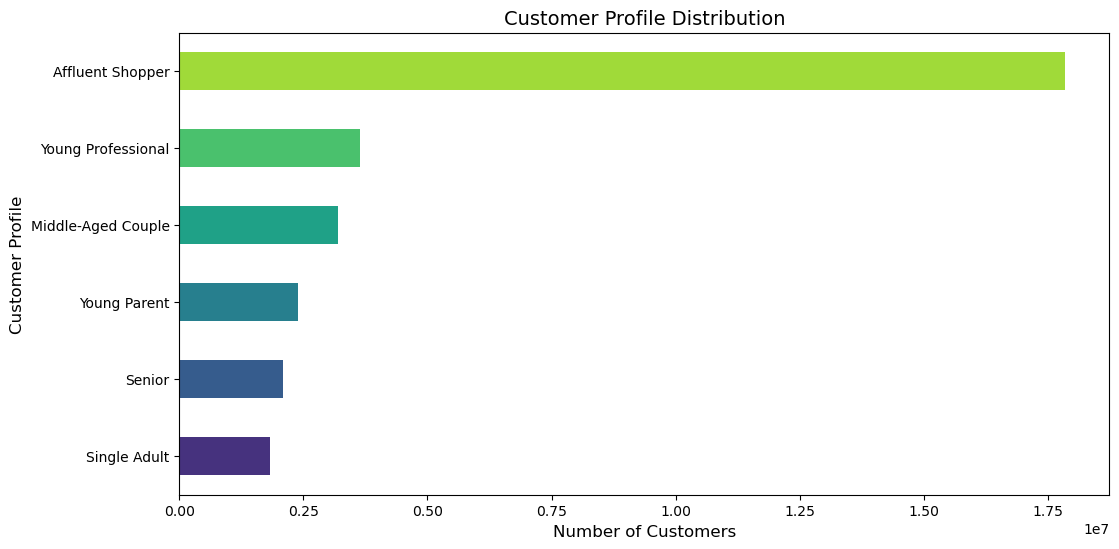

In [25]:
def visualize_customer_profiles_horizontal_bar(data):
    profile_counts = data['customer_profile'].value_counts()
    
    plt.figure(figsize=(12, 6))
    profile_counts.sort_values().plot(kind='barh', color=sns.color_palette('viridis', len(profile_counts)))
    
    plt.title('Customer Profile Distribution', fontsize=14)
    plt.xlabel('Number of Customers', fontsize=12)
    plt.ylabel('Customer Profile', fontsize=12)

    # Save the bar chart as a PNG file
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_distribution.png'))
    # Show the bar chart
    plt.show()

# Call the function
visualize_customer_profiles_horizontal_bar(merged_data)

# Step 7: Aggregate Usage Frequency & Expenditure

In [27]:
# Aggregate max, mean, and min for order frequency & spending per profile
profile_aggregation = merged_data.groupby('customer_profile').agg(
    max_orders=('order_number', 'max'),
    mean_orders=('order_number', 'mean'),
    min_orders=('order_number', 'min'),
    max_spend=('prices', 'max'),
    mean_spend=('prices', 'mean'),
    min_spend=('prices', 'min')
).reset_index()

In [29]:
# Display results
profile_aggregation

,customer_profile,max_orders,mean_orders,min_orders,max_spend,mean_spend,min_spend
0,Affluent Shopper,99,17.896981,1,99999.0,15.089055,1.0
1,Middle-Aged Couple,99,17.783906,1,99999.0,7.613144,1.0
2,Senior,99,17.349502,1,25.0,7.146693,1.0
3,Single Adult,99,17.941263,1,99999.0,7.627109,1.0
4,Young Parent,99,17.771765,1,99999.0,7.737363,1.0
5,Young Professional,99,17.832487,1,99999.0,7.926539,1.0


# Step 8: Customer Behavior Analysis Across Regions and Departments

In [35]:
# Aggregate by profile, region, and department
profile_region_department = merged_data.groupby(['customer_profile', 'Region', 'department_id']).agg(
    total_orders=('order_id', 'count'),
    avg_spend=('prices', 'mean')
).reset_index()

In [45]:
# Display the first few rows
profile_region_department.head()

,customer_profile,Region,department_id,total_orders,avg_spend
0,Affluent Shopper,midwest,1.0,291684,7.818675
1,Affluent Shopper,midwest,2.0,4676,7.367729
2,Affluent Shopper,midwest,3.0,155454,7.965594
3,Affluent Shopper,midwest,4.0,1267245,8.073952
4,Affluent Shopper,midwest,5.0,20146,8.284240


# Step 9: 
## 1. Bar Plot: Average Spend by Customer Profile and Region

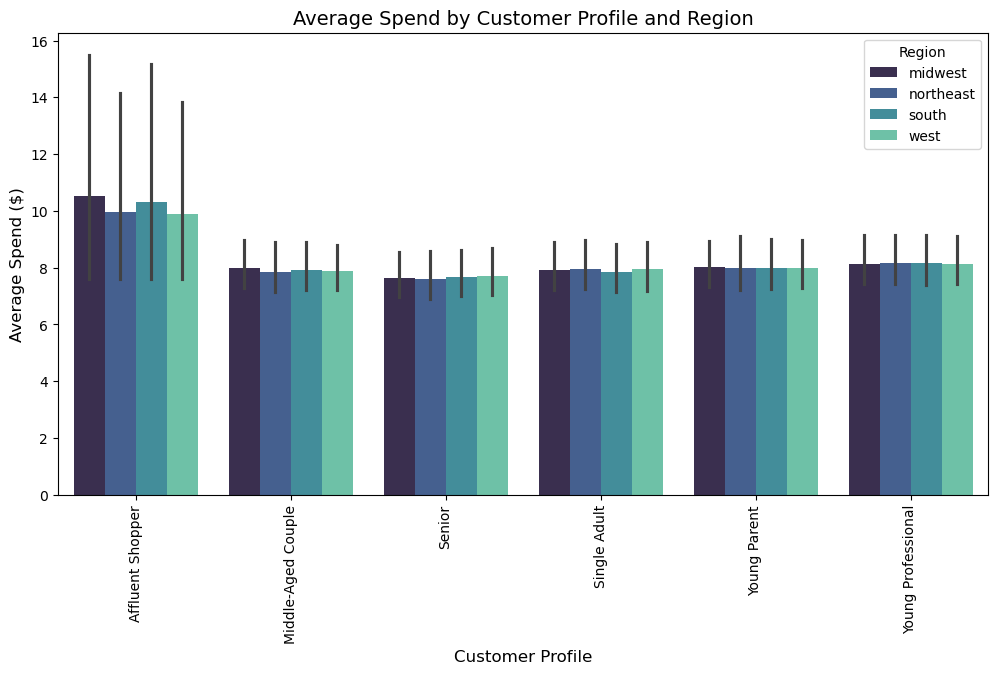

In [63]:
# Use a gradient-based colormap
gradient_palette = sns.color_palette("mako", 4)  # "mako" provides a smooth blue-green gradient
# Group by customer profile and region, and calculate average spend
plt.figure(figsize=(12, 6))
sns.barplot(data=profile_region_department, x='customer_profile', y='avg_spend', hue='Region', palette=gradient_palette)

# Titles and labels
plt.title('Average Spend by Customer Profile and Region', fontsize=14)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Average Spend ($)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region')

# Save the plot as a PNG file with tight bounding box and adjusted padding
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Avg_profile_region.png'), bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()

## 2. Heatmap: Customer Profiles vs. Department Spending (Across Regions)

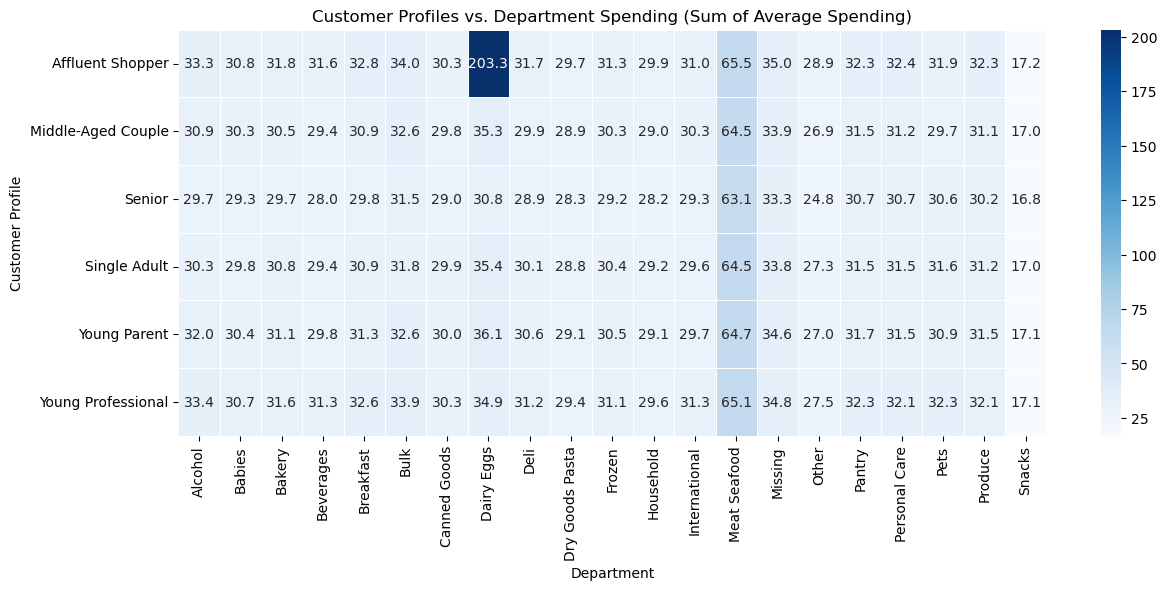

In [39]:
# Define department mapping
department_mapping = {
    1: "Frozen", 2: "Other", 3: "Bakery", 4: "Produce", 5: "Alcohol", 
    6: "International", 7: "Beverages", 8: "Pets", 9: "Dry Goods Pasta", 
    10: "Bulk", 11: "Personal Care", 12: "Meat Seafood", 13: "Pantry", 
    14: "Breakfast", 15: "Canned Goods", 16: "Dairy Eggs", 17: "Household", 
    18: "Babies", 19: "Snacks", 20: "Deli", 21: "Missing"
}

# Map Department_ID to Department Names
profile_region_department['Department'] = profile_region_department['department_id'].map(department_mapping)

# Pivot DataFrame for heatmap
pivot_df = profile_region_department.pivot_table(index='customer_profile', columns='Department', values='avg_spend', aggfunc='sum', fill_value=0)

# Plot Heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt='.1f', linewidths=0.5)
plt.title("Customer Profiles vs. Department Spending (Sum of Average Spending)")
plt.xlabel("Department")
plt.ylabel("Customer Profile")
plt.xticks(rotation=90)
# Adjust layout to prevent cutoff
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin if labels are cut off

# Save the heatmap as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_profile_dep.png'))
# Show the plot
plt.show()

## 3. Stacked Bar Chart: Total Orders per Customer Profile Across Regions

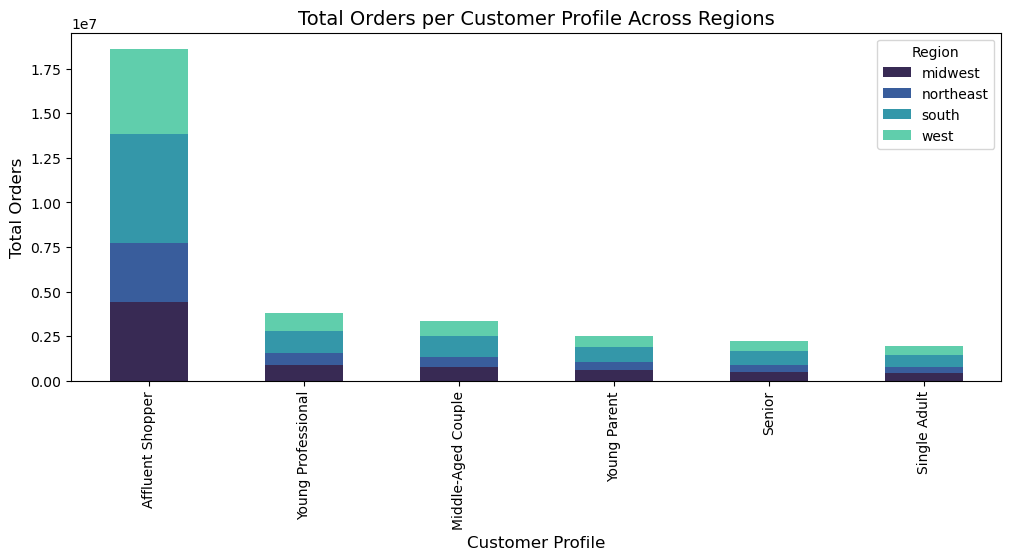

In [41]:
# Use a gradient-based colormap
gradient_palette = sns.color_palette("mako", 4)  # "mako" provides a smooth blue-green gradient
# Pivot the data to get the total orders per customer profile and region
pivot_data = profile_region_department.pivot_table(index='customer_profile', columns='Region', values='total_orders', aggfunc='sum')

# Sort by total orders in ascending order
pivot_data["Total"] = pivot_data.sum(axis=1)  # Create a new column with total orders
pivot_data = pivot_data.sort_values(by="Total", ascending=False).drop(columns=["Total"])  # Sort and drop the extra column

# Plotting the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=gradient_palette)

# Titles and labels
plt.title('Total Orders per Customer Profile Across Regions', fontsize=14)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=90)
# Adjust layout to prevent cutoff
plt.subplots_adjust(bottom=0.3)  # Increase bottom margin if labels are cut off

# Save the bar as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'totalorder_profile_region.png'))
# Show the plot
plt.show()

## 4. Line Chart: Average Spending by Day of the Week

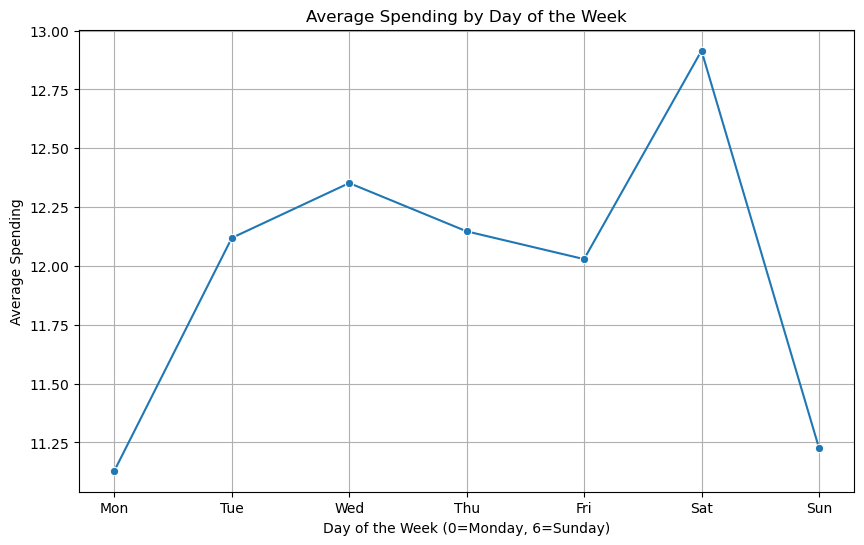

In [106]:
# Group by Day of the Week and calculate average spending
day_spend = merged_data.groupby('order_dow')['prices'].mean().reset_index()

# Plot Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_spend, x='order_dow', y='prices', marker='o')
plt.title("Average Spending by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Spending")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(True)
# Save the line chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_spending_day_week.png'))
# Show the line chart
plt.show()

## 5. Stacked Bar Chart: Shopping Behavior on Weekends vs Weekdays

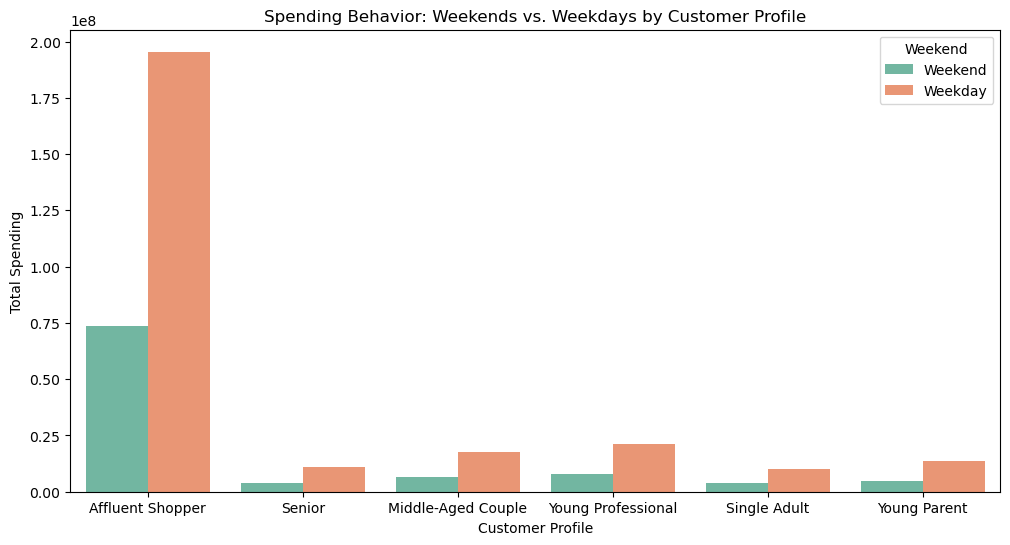

In [25]:
# Add new column to indicate Weekend vs Weekday
merged_data['Weekend'] = merged_data['order_dow'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Plot Stacked Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='customer_profile', hue='Weekend', y='prices', estimator='sum', errorbar=None, palette='Set2')
plt.title("Spending Behavior: Weekends vs. Weekdays by Customer Profile")
plt.xlabel("Customer Profile")
plt.ylabel("Total Spending")
# Save the bar chart as a PNG file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'weekends_weekdays.png'))
# Show the plot
plt.show()

## 6. Heatmap: Day of the Week vs. Hour of the Day (Shopping Activity by Customer Profile)

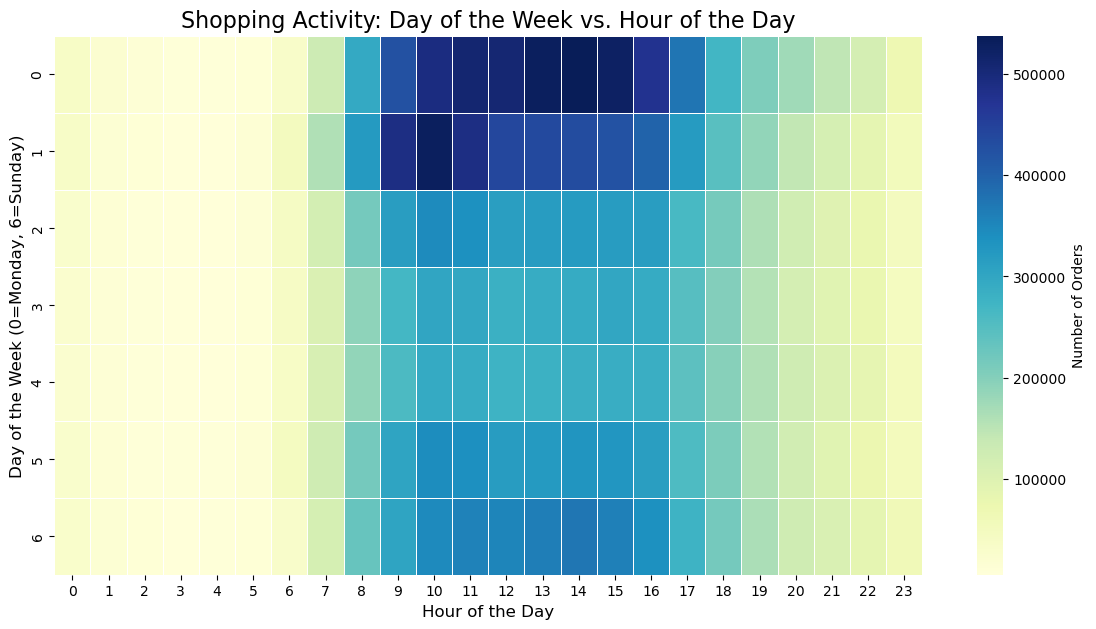

In [36]:
def plot_shopping_activity_heatmap_without_numbers(data):
    # Create pivot table for Heatmap (total orders by time)
    time_pivot = data.pivot_table(index='order_dow', columns='order_hour_of_day', 
                                  values='order_id', aggfunc='count', fill_value=0)
    
    # Plot Heatmap without numbers inside the squares
    plt.figure(figsize=(14, 7))
    sns.heatmap(time_pivot, cmap='YlGnBu', annot=False, linewidths=0.5, cbar_kws={'label': 'Number of Orders'})
    
    # Titles and labels
    plt.title("Shopping Activity: Day of the Week vs. Hour of the Day", fontsize=16)
    plt.xlabel("Hour of the Day", fontsize=12)
    plt.ylabel("Day of the Week (0=Monday, 6=Sunday)", fontsize=12)

    # Save the bar chart as a PNG file
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'days_hours_activity.png'))
    
    # Show the plot
    plt.show()

# Call the function with your dataset
plot_shopping_activity_heatmap_without_numbers(merged_data)


# Export the Dataframe

In [ ]:
# Export the final dataframe 
merged_data.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final.pkl'))